<a href="https://colab.research.google.com/github/willakuffo/autism_ds_project_final/blob/main/Copy_of_Autism_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autistic Spectrum Disorder Screening Data   

**Abstract**: Autistic Spectrum Disorder (ASD) is a neurodevelopment  condition associated with significant healthcare costs, and early diagnosis can significantly reduce these. Unfortunately, waiting times for an ASD diagnosis are lengthy and procedures are not cost effective. The economic impact of autism and the increase in the number of ASD cases across the world reveals an urgent need for the development of easily implemented and effective screening methods. Therefore, a time-efficient and accessible ASD screening is imminent to help health professionals and inform individuals whether they should pursue formal clinical diagnosis.  The rapid growth in the number of ASD cases worldwide necessitates datasets related to behaviour traits. However, such datasets are rare making it difficult to perform thorough analyses to improve the efficiency, sensitivity, specificity and predictive accuracy of the ASD screening process. Presently, very limited autism datasets associated with clinical or screening are available and most of them are genetic in nature. Hence, we propose a new dataset related to autism screening of adults that contained 20 features to be utilised for further analysis especially in determining influential autistic traits and improving the classification of ASD cases. In this dataset, we record ten behavioural features (AQ-10-Child) plus ten individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science. 

# Data Summary statistics from research paper


- Data Type: Multivariate OR Univariate OR Sequential OR Time-Series OR Text OR Domain-Theory
Nominal / categorical, binary and continuous 

- Task: Classification

- Attribute Type: Categorical, continuous and binary  
- Area: Medical, health and social science
- Format Type: Non-Matrix
- Does your data set contain missing values? Yes
- Number of Instances (records in your data set): 292
- Number of Attributes (fields within each record): 21

Relevant Information: For Further information about the attributes/feature see below table

![](https://drive.google.com/uc?id=1K2xb6BEx_Ib88TT4bHX-aRLwplUVYADY)

**Source**:

Fadi Fayez Thabtah
Department of Digital Technology
Manukau Institute of Technology,
Auckland, New Zealand
fadi.fayez@manukau.ac.nz

**Relevant Papers**:

1) Tabtah, F. (2017). Autism Spectrum Disorder Screening: Machine Learning Adaptation and DSM-5 Fulfillment. Proceedings of the 1st International Conference on Medical and Health Informatics 2017, pp.1-6. Taichung City, Taiwan, ACM.

2) Thabtah, F. (2017). ASDTests. A mobile app for ASD screening. www.asdtests.com [accessed December 20th, 2017].

3) Thabtah, F. (2017). Machine Learning in Autistic Spectrum Disorder Behavioural Research: A Review. To Appear in Informatics for Health and Social Care Journal. December, 2017 (in press)

#Importing libraries

In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install empiricaldist

In [ ]:

from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

from empiricaldist import Pmf,Cdf

# Helper functions

In [ ]:
def decorate(**options):
    """Decorate the current axes.
    Call decorate with keyword arguments like
    decorate(title='Title',
             xlabel='x',
             ylabel='y')
    The keyword arguments can be any of the axis properties
    https://matplotlib.org/api/axes_api.html
    """
    plt.gca().set(**options)
    plt.tight_layout()

In [ ]:
def values(series):
    """Count the values and sort.
    
    series: pd.Series
    
    returns: series mapping from values to frequencies
    """
    return series.value_counts().sort_index()

#Downloading the data

In [ ]:
# import os

# filename = 'Autism-Child-Data.arff'
# if not os.path.exists(filename):
#     !wget https://github.com/Lormenyo/Autism-classifier/raw/master/Autism-Screening-Child-Data/Autism-Child-Data.arff

In [ ]:
import os
import gdown

filename2 = 'Autism_Data.arff'
if not os.path.exists(filename2):
    !gdown http://drive.google.com/uc?id=1byZ_EQAU0mh1v1nldrW0pfbsz_uVOZo6

#Loading the Data
>The data contains mostly categorical variables. An_Score, where n is an integer form 1 to 10 are behavioural features. Whereas the other variables are represent individual characteristics

In [ ]:
data = pd.read_csv(filename2)

df = pd.DataFrame(data)



In [ ]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,?,no,no,Egypt,no,2,'18 and more',?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25,f,White-European,no,no,Russia,no,7,'18 and more',Self,YES
700,1,0,0,0,0,0,0,1,0,1,34,m,Hispanic,no,no,Mexico,no,3,'18 and more',Parent,NO
701,1,0,1,1,1,0,1,1,0,1,24,f,?,no,no,Russia,no,7,'18 and more',?,YES
702,1,0,0,1,1,0,1,0,1,1,35,m,'South Asian',no,no,Pakistan,no,6,'18 and more',Self,NO


In [ ]:
#check column data types
df.dtypes

A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
age                object
gender             object
ethnicity          object
jundice            object
austim             object
contry_of_res      object
used_app_before    object
result              int64
age_desc           object
relation           object
Class/ASD          object
dtype: object

Null or Missing Data. Ethnicity and relation columns have 95 missing data each

In [ ]:
#check for missing data nans
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

Handle missing data  `?` by replacing with nans 

In [ ]:


# Converting columns to the right data types and replace missing values with Nan
for column in df.columns:
  try:
    df[column] = df[column].replace('?', np.nan)
  except AttributeError: #when value in column is a float object
    df[column] = df[column].apply(pd.to_numeric)

df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25,f,White-European,no,no,Russia,no,7,'18 and more',Self,YES
700,1,0,0,0,0,0,0,1,0,1,34,m,Hispanic,no,no,Mexico,no,3,'18 and more',Parent,NO
701,1,0,1,1,1,0,1,1,0,1,24,f,NaN,no,no,Russia,no,7,'18 and more',NaN,YES
702,1,0,0,1,1,0,1,0,1,1,35,m,'South Asian',no,no,Pakistan,no,6,'18 and more',Self,NO


In [ ]:
#replaced with nans
df.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

correcting spelling of column names

In [ ]:
df = df.rename(columns={'austim': 'autism','contry_of_res':'country_of_res'})

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'autism', 'country_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

Summary statistics

In [ ]:
#leaves out some columns
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


##We want to explore these variables

- age	
- gender
- ethnicity	
- jundice	
- autism	
- contry_of_res	
	


In [ ]:
explore_columns = ['age','gender','ethnicity','jundice','autism','country_of_res','result','Class/ASD']



> # Age
--------------

age has 2 missing values

In [ ]:
# 2 nans
df['age'].isnull().value_counts()

False    702
True       2
Name: age, dtype: int64

count of the ages

In [ ]:
df['age'].value_counts()

21     49
20     46
22     37
23     37
19     35
24     34
27     31
18     31
30     30
26     28
25     27
29     27
28     24
31     21
32     18
17     18
35     17
37     17
33     16
40     16
42     15
36     13
38     12
34     12
43     11
44     10
47      8
39      7
55      6
46      6
53      6
52      5
50      5
45      4
48      4
49      3
41      3
58      2
54      2
56      2
61      2
383     1
64      1
60      1
59      1
51      1
Name: age, dtype: int64

For some reason, though dtype says int64, the type of the ages itself is a string. Not sure why. To deal with this, i am going to replace the nans first with `909` and then replace `909` with the mean of the ages. There is also an outlier `383`. This will be replaced by `909` too and later replaced with the mean.

In [ ]:
df['age'][0],type(df['age'][0])

('26', str)

In [ ]:
#replace
df['age'] = df['age'].replace(np.nan,'909') #replace nans
df['age'] = df['age'].replace('383','909') #replace 383

Convert to int

In [ ]:
df['age'] = df['age'].astype(np.int64)

Now in proper type

In [ ]:
df['age'][0],type(df['age'][0])

(26, numpy.int64)

Replace `909` which is also now type int with mean of ages

In [ ]:
df['age'] = df['age'].replace(909, df['age'].mean())

In [ ]:
df['age'].describe()

count    704.000000
mean      29.209985
std        9.693863
min       17.000000
25%       21.000000
50%       27.000000
75%       35.000000
max       64.000000
Name: age, dtype: float64

##Cummulative frequency Distribution of the ages

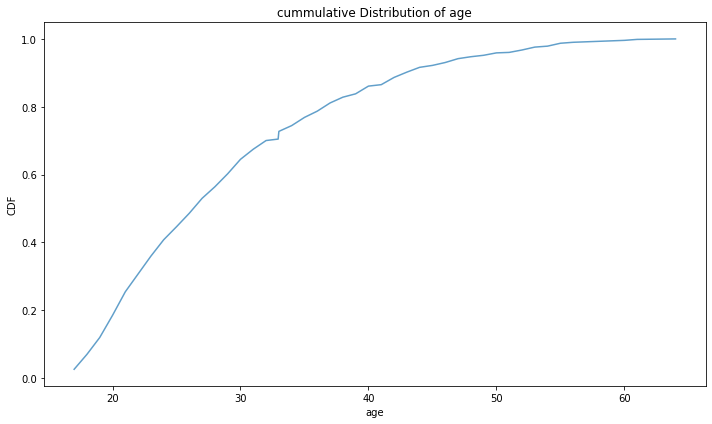

In [ ]:
plt.figure(figsize=(10,6))
cdf = Cdf.from_seq(df['age'])
cdf.plot(alpha=0.7)

decorate(xlabel='age',
         ylabel='CDF',
         title='cummulative Distribution of age')

plt.xticks(rotation=0);

50% of the repondents are 27 and below

In [ ]:
cdf.inverse(0.5)

array(27.)

KDE of Ages. Skewed to the left

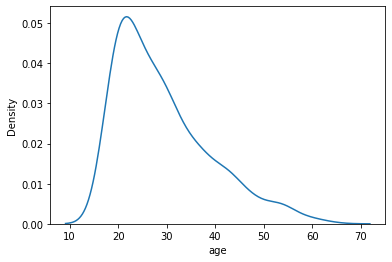

In [ ]:
sns.kdeplot(df['age'])

In [ ]:
df['autism'].value_counts()

no     613
yes     91
Name: autism, dtype: int64

In [ ]:
df['gender'].value_counts()

m    367
f    337
Name: gender, dtype: int64

In [ ]:
df['jundice'].value_counts()

no     635
yes     69
Name: jundice, dtype: int64

percentage who are / have ...

In [ ]:
def percentage(column,response):
  p = df[column].value_counts()[response]/ df[column].value_counts().sum()
  print(column,':',p,response)

In [ ]:
percentage('gender','m')

gender : 0.5213068181818182 m


In [ ]:
percentage('jundice','yes')

jundice : 0.09801136363636363 yes


In [ ]:
percentage('autism','yes')

autism : 0.12926136363636365 yes


##  Comparing Autism and age, gender, jaundice

In [ ]:
male = df['gender'] =='m'
female = df['gender'] =='f'
autism = df['autism'] == 'yes'
jundice = df['jundice'] == 'yes'
age = df['age']


In [ ]:
male_age = age[male]
female_age = age[female]
autism_age = age[autism]
jundice_age = age[jundice]



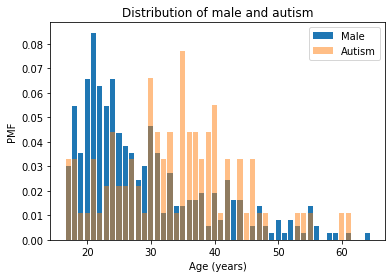

In [ ]:
Pmf.from_seq(male_age).bar(label='Male')
#Pmf.from_seq(female_age).plot(label='Female')
#Pmf.from_seq(jundice_age).plot(label='Jundice')
Pmf.from_seq(autism_age).bar(label='Autism',alpha = 0.5)
plt.xlabel('Age (years)') 
plt.ylabel('PMF')
plt.title('Distribution of male and autism')
plt.legend();

Compare pdf distributions by age

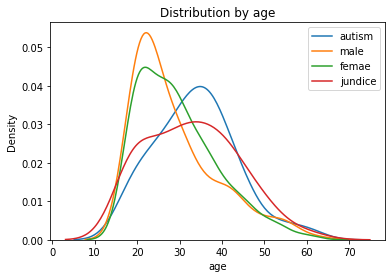

In [ ]:
sns.kdeplot(autism_age,label = 'autism')
sns.kdeplot(male_age,label = 'male')
sns.kdeplot(female_age,label = 'femae')
sns.kdeplot(jundice_age,label = 'jundice')
plt.title('Distribution by age')
plt.legend()

#Ethnicity

In [ ]:
df['ethnicity'].isnull().value_counts()

False    609
True      95
Name: ethnicity, dtype: int64

In [ ]:
df['ethnicity'].value_counts()

White-European       233
Asian                123
'Middle Eastern '     92
Black                 43
'South Asian'         36
Others                30
Latino                20
Hispanic              13
Pasifika              12
Turkish                6
others                 1
Name: ethnicity, dtype: int64

In [ ]:
df['ethnicity'].describe()

count                609
unique                11
top       White-European
freq                 233
Name: ethnicity, dtype: object

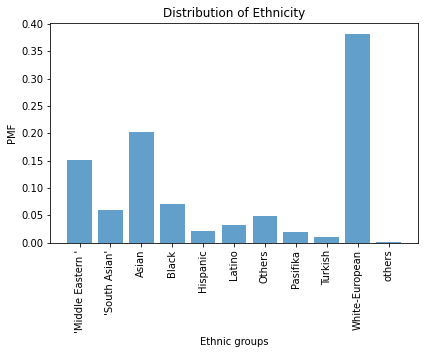

In [ ]:
pmf = Pmf.from_seq(df['ethnicity'])
pmf.bar(alpha=0.7)

decorate(xlabel='Ethnic groups',
         ylabel='PMF',
         title='Distribution of Ethnicity')

plt.xticks(rotation=90);

In [ ]:
# ethnicity and relation column is going to be removed the df
# df.drop(["ethnicity", "relation"], axis=1, inplace=True)


In [ ]:
# the missing values in the age column will be handled by replacing the NaNs with mean value of the ages
#df["age"] = df["age"].apply(pd.to_numeric)
#df["age"] = df["age"].replace(np.nan, df["age"].mean())

In [ ]:
#label_encoder = LabelEncoder()

#stringColumns = ['gender', 'jundice', 'autism', 'used_app_before','Class/ASD']
#for column in stringColumns:
#    df[column] = label_encoder.fit_transform(df[column])

## Questions that we hope to answer


- Do people who have jaundice have a higher chance of being autistic?

- Does your ethnicity affect your chances of being autistic?

- Do more females tend to autistic than males?


## Getting the distribution of the variables

###Distribution for ethnicity

In [ ]:
values(df['ethnicity'])

'Middle Eastern '     92
'South Asian'         36
Asian                123
Black                 43
Hispanic              13
Latino                20
Others                30
Pasifika              12
Turkish                6
White-European       233
others                 1
Name: ethnicity, dtype: int64

There is an 'Others' and 'others' value which means they are the same. We will merge these two values.

In [ ]:
df['ethnicity'] = df['ethnicity'].replace('Others', 'others')

Now, we can visualize the Probability mass distribution of ethinicity 

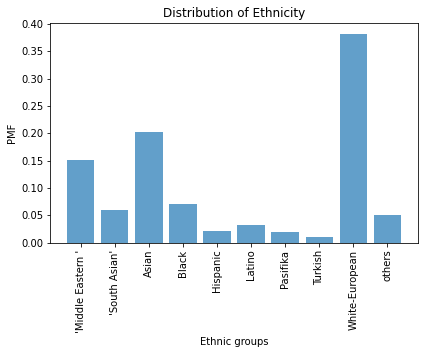

In [ ]:
pmf = Pmf.from_seq(df['ethnicity'])
pmf.bar(alpha=0.7)

decorate(xlabel='Ethnic groups',
         ylabel='PMF',
         title='Distribution of Ethnicity')

plt.xticks(rotation=90);

Use Groupby on Autism with jundice, gender and ethnicity

Groupby Ethnicity and Autism

In [ ]:
by_ethnicity = df.groupby(by= 'ethnicity')

In [ ]:
pd.DataFrame(by_ethnicity['autism'].value_counts())

autism
ethnicity         autism        
'Middle Eastern ' no          83
                  yes          9
'South Asian'     no          34
                  yes          2
Asian             no         118
                  yes          5
Black             no          38
                  yes          5
Hispanic          no          12
                  yes          1
Latino            no          12
                  yes          8
Pasifika          no          10
                  yes          2
Turkish           no           5
                  yes          1
White-European    no         183
                  yes         50
others            no          29
                  yes          2

recode autism response, yes 1, no 0

In [ ]:
df['autism_recoded']= df['autism'].replace({'yes':1,'no':0})

In [ ]:
#recoded
by_ethnicity['autism_recoded'].value_counts()

ethnicity          autism_recoded
'Middle Eastern '  0                  83
                   1                   9
'South Asian'      0                  34
                   1                   2
Asian              0                 118
                   1                   5
Black              0                  38
                   1                   5
Hispanic           0                  12
                   1                   1
Latino             0                  12
                   1                   8
Pasifika           0                  10
                   1                   2
Turkish            0                   5
                   1                   1
White-European     0                 183
                   1                  50
others             0                  29
                   1                   2
Name: autism_recoded, dtype: int64

Latinos most likely to get autism, followed by white Europeans. Asians leat likely to get





In [ ]:
pd.DataFrame(by_ethnicity['autism_recoded'].mean().sort_values(ascending = False)).style.background_gradient(cmap='Reds')

,autism_recoded
ethnicity,
Latino,0.400000
White-European,0.214592
Turkish,0.166667
Pasifika,0.166667
Black,0.116279
'Middle Eastern ',0.097826
Hispanic,0.076923
others,0.064516
'South Asian',0.055556


By Gender

In [ ]:
by_gender = df.groupby('gender')

In [ ]:
pd.DataFrame(by_gender['autism'].value_counts())

autism
gender autism        
f      no         283
       yes         54
m      no         330
       yes         37

In [ ]:
#df['gender_recoded'] = df['gender'].replace({'m':1,'f':0})

Females more likely autism

In [ ]:
by_gender['autism_recoded'].mean()

gender
f    0.160237
m    0.100817
Name: autism_recoded, dtype: float64

By Jundice

In [ ]:
by_jundice = df.groupby('jundice')

Jundice is more likely to cause autsim

In [ ]:
by_jundice['autism_recoded'].mean()

jundice
no     0.111811
yes    0.289855
Name: autism_recoded, dtype: float64

By age

Recode the ages on a 6 point scale

In [ ]:
df['age'].describe()

count    704.000000
mean      29.209985
std        9.693863
min       17.000000
25%       21.000000
50%       27.000000
75%       35.000000
max       64.000000
Name: age, dtype: float64

(array([ 84., 340., 166.,  80.,  30.,   4.]),
 array([10, 20, 30, 40, 50, 60, 70]),
 <a list of 6 Patch objects>)

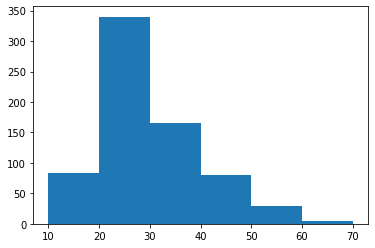

In [ ]:
plt.hist(df['age'],[10,20,30,40,50,60,70])

In [ ]:
codes = {}
bins = [10,20,30,40,50,60,70]
for i in range(int(df['age'].min()),int(df['age'].max()+1)): #generate ages in the distribution
   if i>bins[0] and i<=bins[1]:
     codes[i] = '10_20'
   if i>bins[1] and i<=bins[2]:
     codes[i] = '20_30'
   if i>bins[2] and i<=bins[3]:
     codes[i] = '30_40'
   if i>bins[3] and i<=bins[4]:
     codes[i] = '40_50'
   if i>bins[4] and i<=bins[5]:
     codes[i] = '50_60'
   if i>bins[5] and i<=bins[6]:
     codes[i] = '60_70'
   

codes

{17: '10_20',
 18: '10_20',
 19: '10_20',
 20: '10_20',
 21: '20_30',
 22: '20_30',
 23: '20_30',
 24: '20_30',
 25: '20_30',
 26: '20_30',
 27: '20_30',
 28: '20_30',
 29: '20_30',
 30: '20_30',
 31: '30_40',
 32: '30_40',
 33: '30_40',
 34: '30_40',
 35: '30_40',
 36: '30_40',
 37: '30_40',
 38: '30_40',
 39: '30_40',
 40: '30_40',
 41: '40_50',
 42: '40_50',
 43: '40_50',
 44: '40_50',
 45: '40_50',
 46: '40_50',
 47: '40_50',
 48: '40_50',
 49: '40_50',
 50: '40_50',
 51: '50_60',
 52: '50_60',
 53: '50_60',
 54: '50_60',
 55: '50_60',
 56: '50_60',
 57: '50_60',
 58: '50_60',
 59: '50_60',
 60: '50_60',
 61: '60_70',
 62: '60_70',
 63: '60_70',
 64: '60_70'}

In [ ]:
#check if nothing was counted and recoded 2 times
len(codes)#== len(df)

48

In [ ]:
df['age_recoded'] = df['age'].replace(codes)

In [ ]:
#df['age'].value_counts()

now group_by recoded categorical age

In [ ]:
by_age = df.groupby('age_recoded')

In [ ]:
by_age['autism_recoded'].value_counts()

age_recoded        autism_recoded
32.94318181818182  0                   3
10_20              0                 122
                   1                   8
20_30              0                 298
                   1                  26
30_40              0                 110
                   1                  39
40_50              0                  56
                   1                  13
50_60              0                  22
                   1                   4
60_70              0                   2
                   1                   1
Name: autism_recoded, dtype: int64

Older people most likly to get autism. Seemed a little surprising to me so I did a little research. Here are some sources that talk about this.

In [ ]:
pd.DataFrame(by_age['autism_recoded'].mean().sort_values(ascending = False)).style.background_gradient(cmap = 'Reds')

,autism_recoded
age_recoded,
60_70,0.333333
30_40,0.261745
40_50,0.188406
50_60,0.153846
20_30,0.080247
10_20,0.061538
32.94318181818182,0.000000


Now to explore the correlation between these variables
- Autism
- Jundice
- Gender

Recode the rest of the binary variables, Jundice and Gender
- gender  `->` male 1, female 0
- jundice `->` yes 1, no 0


In [ ]:
#recode jundice
df['jundice_recoded'] = df['jundice'].replace({'yes':1,'no':0})
df['gender_recoded'] = df['gender'].replace({'m':1,'f':0})

In [ ]:
columns = ['autism_recoded', 'jundice_recoded', 'gender_recoded',]
subset = df[columns]
subset

,autism_recoded,jundice_recoded,gender_recoded
0,0,0,0
1,1,0,1
2,1,1,1
3,1,0,0
4,0,0,0
...,...,...,...
699,0,0,0
700,0,0,1
701,0,0,0
702,0,0,1


Correlation

In [ ]:
subset.corr()

,autism_recoded,jundice_recoded,gender_recoded
autism_recoded,1.000000,0.157793,-0.088477
jundice_recoded,0.157793,1.000000,-0.018842
gender_recoded,-0.088477,-0.018842,1.000000


# Plotting the results

We are going to create a pivot table that investigates how autism is related to 

- age and ethnicity
- age and gender
- age and jundice

## Age and Ethnicity
-------------------

In [ ]:
table = df.pivot_table(values = 'autism_recoded',index = 'age',columns = 'ethnicity',aggfunc = 'mean')

In [ ]:
table.head()

ethnicity,'Middle Eastern ','South Asian',Asian,Black,Hispanic,Latino,Pasifika,Turkish,White-European,others
age,,,,,,,,,,
17.0,0.000000,0.0,0.5,0.000000,NaN,NaN,NaN,NaN,0.166667,NaN
18.0,0.076923,1.0,0.0,0.000000,NaN,NaN,NaN,NaN,0.090909,NaN
19.0,0.000000,0.0,0.0,0.000000,0.0,1.000000,NaN,NaN,0.000000,0.0
20.0,0.071429,0.0,0.0,0.000000,NaN,0.000000,0.0,NaN,0.000000,0.0
21.0,0.000000,0.0,0.0,0.333333,0.0,0.333333,0.0,0.0,0.142857,0.0


Ethnicity has some nans which means,for those rows and variables, we cannot interprate those variables in terms of Ethnicity. Therefore to make our analysis easier, I will make a copy of the df and frop those rows

In [ ]:
df['ethnicity']

0      White-European
1              Latino
2              Latino
3      White-European
4                 NaN
            ...      
699    White-European
700          Hispanic
701               NaN
702     'South Asian'
703    White-European
Name: ethnicity, Length: 704, dtype: object

no of missing Ethnic values

In [ ]:

df['ethnicity'].isnull().sum()

95

copy df so that we dont alter the original

In [ ]:
dfcopy = df.copy()
dfcopy.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD,autism_recoded,age_recoded,jundice_recoded,gender_recoded
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO,0,20_30,0,0
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO,1,20_30,0,1
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES,1,20_30,1,1
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO,1,30_40,0,0
4,1,0,0,0,0,0,0,1,0,0,40.0,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO,0,30_40,0,0


In [ ]:
dfcopy.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 0
gender              0
ethnicity          95
jundice             0
autism              0
country_of_res      0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
autism_recoded      0
age_recoded         0
jundice_recoded     0
gender_recoded      0
dtype: int64

drop uneeded column because missing values in relation may not be on the same rows as missing values in ethnicity

In [ ]:
if 'relation' in dfcopy.columns: 
  dfcopy = dfcopy.drop('relation',axis = 1)
'relation' in dfcopy.columns

False

now drop rows with missing Ethnicity values

In [ ]:
dfcopy = dfcopy.dropna(axis = 0)

no more missing Ethnic values

In [ ]:
dfcopy.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
autism             0
country_of_res     0
used_app_before    0
result             0
age_desc           0
Class/ASD          0
autism_recoded     0
age_recoded        0
jundice_recoded    0
gender_recoded     0
dtype: int64

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess

def make_lowess(series):
    """Use LOWESS to compute a smooth line.
    
    series: pd.Series
    
    returns: pd.Series
    """
    y = series.values
    x = series.index.values

    smooth = lowess(y, x)
    index, data = np.transpose(smooth)

    return pd.Series(data, index=index) 

def plot_series_lowess(series, color):
    """Plots a series of data points and a smooth line.
    
    series: pd.Series
    color: string or tuple
    """
    series.plot(linewidth=0, marker='o', color=color, alpha=0.8)
    smooth = make_lowess(series)
    smooth.plot(label='_', color=color)

def plot_columns_lowess(table, columns, colors):
    """Plot the columns in a DataFrame.
    
    table: DataFrame with a cross tabulation
    columns: list of column names, in the desired order
    colors: mapping from column names to colors
    """
    for col in columns:
        series = table[col]
        plot_series_lowess(series, colors[col])

generate colour groups for ethnic groups

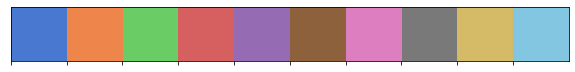

In [ ]:
no_colours = dfcopy['ethnicity'].describe()['unique']
ethnic_colours = sns.color_palette('muted', no_colours)
sns.palplot(ethnic_colours)

In [ ]:
ethnic_colours[0]

(0.2823529411764706, 0.47058823529411764, 0.8156862745098039)

In [ ]:
for ethnic in dfcopy['ethnicity'].unique():print(ethnic)

White-European
Latino
others
Black
Asian
'Middle Eastern '
Pasifika
'South Asian'
Hispanic
Turkish


Assign colours to ethnic groups

In [ ]:
#select colours to represent ethnic groups
colours = {}
colour_idx = 0
for group in dfcopy['ethnicity'].unique():
  colours[group] = ethnic_colours[colour_idx]
  colour_idx +=1

In [ ]:
columns = dfcopy['ethnicity'].unique()

plot the result

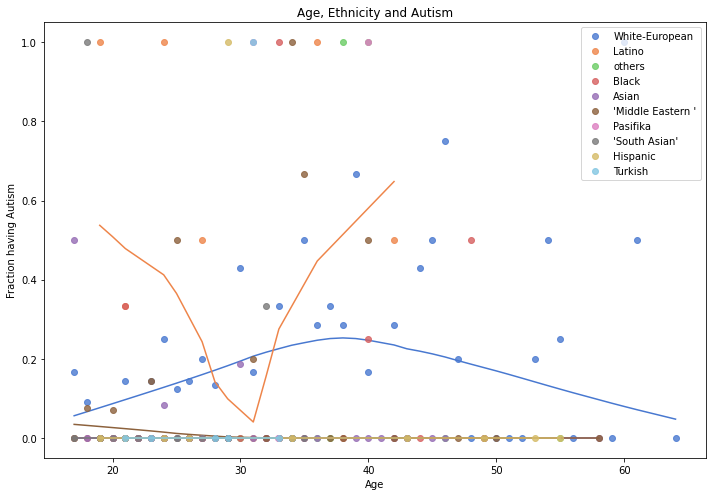

In [ ]:
plt.figure(figsize = (10,7))
plot_columns_lowess(table,columns,colours)

decorate(xlabel='Age',
         ylabel='Fraction having Autism',
         
         title='Age, Ethnicity and Autism')

plt.legend();

##Age Gender and Autism
---------------------------

gender colours

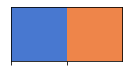

In [ ]:
no_colours = df['gender'].describe()['unique']
gender_colours = sns.color_palette('muted', no_colours)
sns.palplot(gender_colours)

Assign colours to gender

In [ ]:
colours = {'m':gender_colours[0],'f':gender_colours[1]}

create pivot table

In [ ]:
table = df.pivot_table(values = 'autism_recoded',index = 'age',columns = 'gender',aggfunc = 'mean')

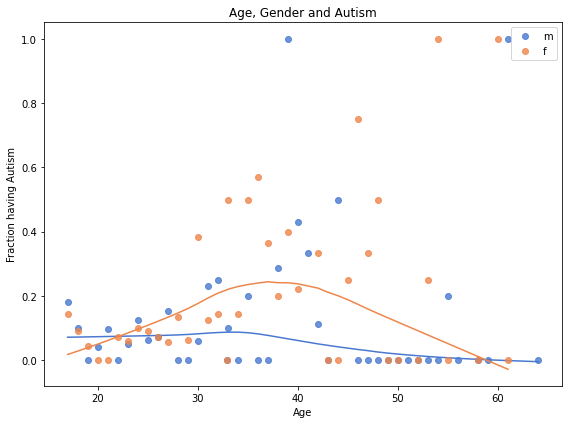

In [ ]:
columns = ['m','f']
plt.figure(figsize = (8,6))
plot_columns_lowess(table,columns,colours)

decorate(xlabel='Age',
         ylabel='Fraction having Autism',
        
         title='Age, Gender and Autism')

plt.legend();

##Age, Jundice and Autism
-------------------------------

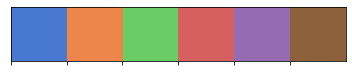

In [ ]:
no_colours = 6

jundice_colours = sns.color_palette('muted', no_colours)
sns.palplot(jundice_colours)

In [ ]:
colours = {'yes':jundice_colours[0],'no':jundice_colours[3]}

In [ ]:
table = df.pivot_table(values = 'autism_recoded',index = 'age',columns = 'jundice',aggfunc = 'mean')

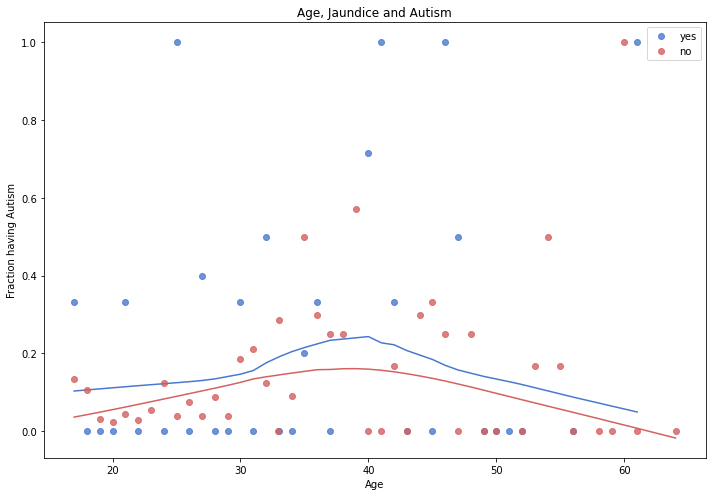

In [ ]:
columns =  ['yes', 'no']
plt.figure(figsize = (10,7))
plot_columns_lowess(table,columns,colours)

decorate(xlabel='Age',
         ylabel='Fraction having Autism',
        
         title='Age, Jaundice and Autism')

plt.legend();